# Chapter 1

In [1]:
from sklearn.cluster import KMeans

In [2]:
model = KMeans(n_clusters=3)

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
iris=datasets.load_iris()
X=iris.data
y=iris.target
df=pd.DataFrame(X, columns=iris.feature_names)

In [4]:
labels=model.fit_predict(X)

In [7]:
df = pd.DataFrame({'labels': labels, 'actual': y})

In [8]:
df.head()

,actual,labels
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


____
#### We use pandas crosstab method in order to evaluate our clustering.
model.inertia_ metric is minimized, but at the same time no. of clusters shouldn't be too large. Hence, elbows are looked for.
____

In [9]:
ct = pd.crosstab(df['labels'],df['actual'])

In [10]:
print(ct)

actual   0   1   2
labels            
0        0  48  14
1       50   0   0
2        0   2  36


In [11]:
import matplotlib.pyplot as plt

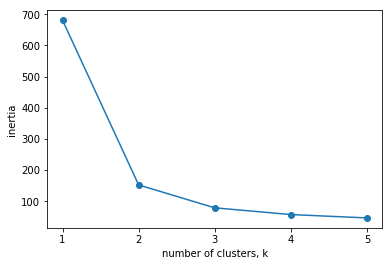

In [12]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(X)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

**Here, no. of clusters to be taken should be either 2 or 3, since both represent elbows**

____
____
In order to improve our clustering, we use **StandardScaler** so as to make each feature have *mean* 0 and *variance* 1, as a high feature variance increases its influence on the clustering.

____

In [13]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [14]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels':labels,'species':y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

species   0   1   2
labels             
0        50   0   0
1         0  39  17
2         0  11  33


____
If no improvement is observed, other preprocessing techniques such as **MaxAbsScaler** and **Normalizer** can also be tried.
____

In [16]:
# Import Normalize
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(X)


Pipeline(steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [17]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(X)

## Create a DataFrame aligning labels and companies: df
#df = pd.DataFrame({'labels': labels, 'companies': companies})

## Display df sorted by cluster label
#print(df.sort_values('labels'))

In [18]:
df = pd.DataFrame({'labels':labels,'species':y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['species'])

# Display ct
print(ct)

species   0   1   2
labels             
0         0   5  50
1        50   0   0
2         0  45   0


___
___


# Chapter 2

___
___

**Hierarchical Clustering** can be performed in order to gain insights about the data via visualization. The visualization is achieved via dendrograms. Initially, each sample is a cluster itself. At each step, the two closest clusters are merged, finally leaving only one cluster.

____

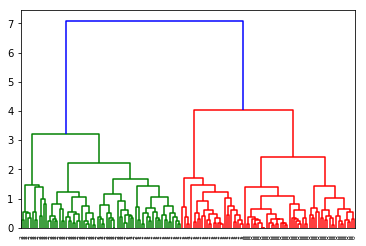

In [6]:
# Perform the necessary imports
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(X, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=y,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


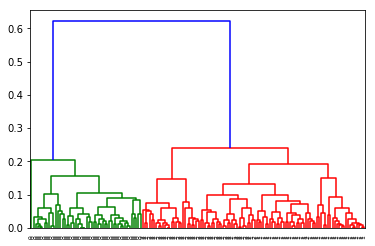

In [8]:
# Import normalize
from sklearn.preprocessing import normalize

# Normalize the movements: normalized_movements
normalized_movements = normalize(X)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings, labels=y, leaf_rotation=90, leaf_font_size=6)
plt.show()


___

In heirarchical clustering, cluster labels at intermediate levels can be recovered and used for tasks such as cross tabulation. In order to that, the height needs to be mentioned.

* Height on dendogram - Distance between merging clusters
* Distance between clusters specified by **linkage** method
    * Specified by *method* parameter, e.g. linkage(samples, **method = 'complete'**)
    * complete - distance between clusters is max distance between samples    
    
    
* Intermediate cluster labels are extracted using **fcluster** method.
____


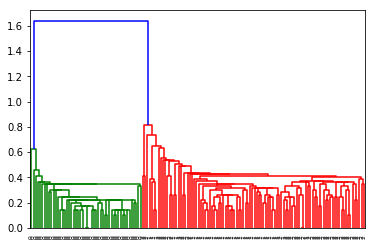

In [9]:
# performing single linkage hierarchical clustering produces a different dendrogram!

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(X, method='single')

# Plot the dendrogram
dendrogram(mergings, labels=y, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [10]:
#Extracting the cluster labels

# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
1          50  50  50



____

### t-SNE for 2 dimensional maps

* t-SNE = "t-distributed stochastic neighbor embedding"
* Maps samples from higher dimensional space to 2D or 3D space, preserves nearness of samples

#### t-SNE on iris

* 4 dimensions, maps to 2D space
* Graph reveals 2 clusters are closer to each other, hence total no. of clusters can be 2. This was also represented by the inertia plot.
* Has 2 important components: only a fit_transform() method and no individual fit and transform, and a learning rate which has to be chosen according to the dataset; try values between 50-200
* t-SNE features are different every time it is called.

___

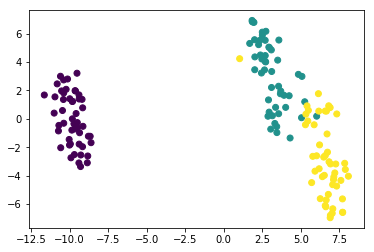

In [13]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=y)
plt.show()


____
____

# Chapter 3
____
____

## Dimension Reduction 

* Finds patterns in data and uses them to rexpress it in compressed form
* Makes storage and computation efficient
* Most important function is to remove "noisy" features that cause problems in supervised learning tasks

### Principal Component Analysis

First step - decorrelation  
Second step - reduces dimensions

First Step -  

* Rotates data samples to be aligned with coordinate axes
* Shifts data samples so they have mean 0.
* No information is lost in this step
* PCA has a scikit-learn component just like KMeans or StandardScaler
* *fit()* learns how to shift and rotate the samples, but doesn't actually change them
* *transform()* applies the learned information; can be applied to new data

____
* Features of some raw dataset are often correlated; not the case with PCA features
* PCA performs rotations that decorrelate the data

#### Linear correlation cam be measured using Pearson correlation

* Values between -1 and 1; larger values correspond to stronger correlation
* 0 means no correlation
* PCA identifies the "principal components", i.e., the directions of variance.
* PCA aligns principal components with the axes.


* Principal components are available as **components\_** attribute of PCA object

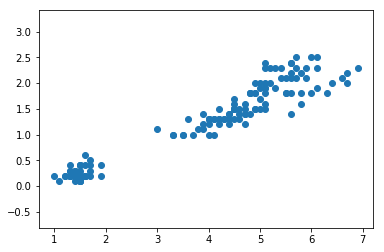

0.962757097051 5.7766609885e-86


In [4]:
# Correlated data in nature
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = X[:,2]

# Assign the 1st column of grains: length
length = X[:,3]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width,length)
print(correlation,pvalue)

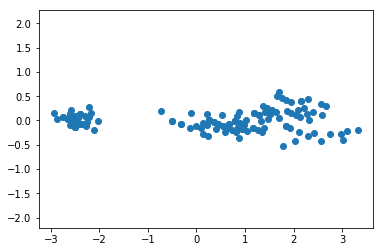

8.18673655351e-18


In [6]:
# Decorrelating the grain measurements with PCA
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(X[:,[2,3]])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

____

## Intrinsic Dimension

* **No. of features reqd to approximate the dataset**
* Tells how much data can be compressed
* Intrinsic dimension = No. of PCA features with significant variance

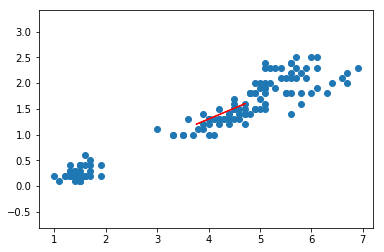

In [7]:
# The first principal component
# Make a scatter plot of the untransformed points
plt.scatter(X[:,2], X[:,3])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(X[:,[2,3]])

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

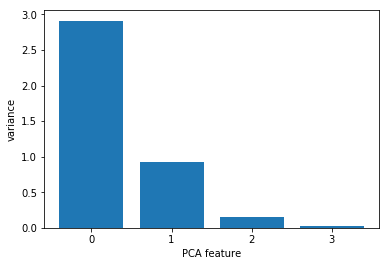

In [8]:
# Variance of the PCA features
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

____

## Dimension reduction with PCA

* Represents same data using less features, important part of machine learning pipeline.
* PCA features are in decreasing order of variance
* Need to specify how many features to keep using **n_features** argument: Intrinsic dimension is a good choice.
* PCA assumes high variance features are important, which is mostly true.
* We use TruncatedSVD instead of PCA for sparse matrices

In [9]:
# Dimension reduction of the fish measurements
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(X)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X)

# Print the shape of pca_features
print(pca_features.shape)


(150, 2)


In [ ]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)

In [ ]:
# Clustering Wikipedia

# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))

____
____

# Chapter 4
____
____

## Non-negative matrix factorization (NMF)


* Dimesion reduction technique
* In contrast to PCA, NMF models are interpretable
* **All sample features must be non-negative**
* Follows fit()/transform() pattern just like PCA
* Necessary to specify *n_components*
* Works with numpy arrays and csr_matrix
* NMF has components just like principal components in PCA which it learns from the samples.
* Dimension of components = Dimension of samples
* Entries of NMF components are always non-negative
* NMF feature values are also non-negative
* Feature values can be combined with components to reconstruct the original samples
    * Multiply components by feature values and add up: can also be expressed as product of matrices

In [10]:
# NMF applied to Wikipedia articles

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=2)

# Fit the model to articles
model.fit(X)

# Transform the articles: nmf_features
nmf_features = model.transform(X)

# Print the NMF features
print(nmf_features)

[[ 0.10534643  1.32900316]
 [ 0.13521971  1.17474412]
 [ 0.10169058  1.21426258]
 [ 0.14176706  1.124735  ]
 [ 0.09732646  1.33658651]
 [ 0.15151672  1.37778596]
 [ 0.11237879  1.20927904]
 [ 0.12793372  1.26382737]
 [ 0.13447406  1.06743877]
 [ 0.13837186  1.18701479]
 [ 0.11410037  1.40291973]
 [ 0.14250103  1.20623492]
 [ 0.12598076  1.17054256]
 [ 0.0662085   1.16049624]
 [ 0.04779945  1.61506745]
 [ 0.08812599  1.59736891]
 [ 0.08155995  1.4751931 ]
 [ 0.11312444  1.31658439]
 [ 0.15468055  1.41586207]
 [ 0.11093654  1.36484363]
 [ 0.16875585  1.28160514]
 [ 0.12527359  1.32822117]
 [ 0.02152594  1.36751231]
 [ 0.19426611  1.17028412]
 [ 0.19496861  1.13317956]
 [ 0.17165903  1.14266088]
 [ 0.16097894  1.21463803]
 [ 0.12429656  1.32127171]
 [ 0.1133664   1.32141982]
 [ 0.15415816  1.14120723]
 [ 0.16217813  1.13362389]
 [ 0.14933349  1.30547115]
 [ 0.07716436  1.47891255]
 [ 0.06527696  1.56491023]
 [ 0.13837186  1.18701479]
 [ 0.0885842   1.28847537]
 [ 0.09370099  1.41983629]
 

In [ ]:
# NMF features of the Wikipedia articles

# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features,index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

## NMF Components

* For documents:
    * NMF components represent topics
    * NMF features combine topics into documents
* For images, NMF components are part of images

### Grayscale images

* No color, only shade of gray
* Each pixel can be represented can be represented by values between 0 and 1, where 0 is totally black, thereby converting it to 2D numpy array

In [ ]:
# NMF learns topics of documents

# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_,columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

In [ ]:
# Explore the LED digits dataset

# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
# NMF learns the parts of images

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

In [ ]:
# PCA doesn't learn parts

# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

____

## Build recommender systems using NMF

* Recommender systems for newspaper articles can be built using NMF
    * NMF feature values describe topics; similar topics will have similar feature values
    * But they may not be exactly the same!
    * Fortunately, in NMF, all these values lie on the same hyperplane in the scatterplot passing through the origin
    * Can be compared using cosine similarity, higher values reflects similarity
    

In [ ]:
# Which articles are similar to 'Cristiano Ronaldo'?

# Perform the necessary imports
import pandas as pd
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features,index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

In [ ]:
# Recommend musical artists

# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

# Import pandas
import pandas as pd

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

____
____